<a href="https://colab.research.google.com/github/muhizijoel/first-repo/blob/master/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
Modeling temperature as a function of height<br>
Joel Muhizi<br>
Harrisburg University
</h1>

## Abstract
This report documents the development and analysis of a model of height as a function of pressure given raw data collected by balloons. 

## Introduction

### Problem statement
In this assignment, there is a need to obtain temperature profiles of the atmosphere as a data pair of (height, temperature) [1]. In [1], the data collection method used, involves several balloons that are carrying a collection of sensors (temperature, pressure, ...). In order to minimize the cost of conducting the experiment, instead of including a GPS sensor (relatively expensive) on each ballon to capture the height, it is decided to equip most of the balloons with a temperature sensor and a pressure sensor (relatively cheaper). These balloons will send the data pair (pressure, temperature). Furthermore, it is decided that one balloon will be equiped with a sensor module that has a pressure sensor and a GPS. This balloon will transmit the data pair (pressure, height). With setup, we are asked to develop a model of the height as a function of the pressure, that will be used to predict the height at which a pressure reading was obtained.

## Methods

### Data collection
We start with a dataset given by the professor at 
http://borealscicomp.com/Academic/HU/CISC614-LF19/Assignment06/fairbanks_sounding.dat. In order to retrieve the data, I am going to use a routine that was given by the professor in the assignment statement in [1]. When run with the url above, this routine fetches the dataset and returns the tuple (pressure, height), where pressure and height are both lists of pressure measurements and height measurements respectively.

This data is in the format below [1]:
P (hPa)  H (m)

 988     581

 958     647

 974     820

 927     721

 866     889

      .

      .

      .

  51   20784

  25   21355

  13   23147








In [0]:
import numpy as np
import urllib
from matplotlib import pyplot as plt
import math

def retrieve_pressure_height_data(the_url=None):

    # Retrieve specified datafile that has the following format

    """

    P (hPa)  H (m)

    988     581

    958     647

    974     820

    .

    .

    .

    25   21355

    13   23147

    """


    # Make the request, expecting a raw HTML stream for response

    try:

        raw_content = urllib.request.urlopen(the_url).read().strip()

    except:

        print('Request failed: %s' % the_url)

        return None


    #print(raw_content)


    # Convert the raw HTML stream to lines

    lines = raw_content.decode('utf-8').split('\n')


    # Assume first line is header, and put the rest into arrays

    pressure = np.ndarray((len(lines)-1))

    height = np.ndarray((len(lines)-1))

    for i in np.arange(1, len(lines)):

        tokens = lines[i].split()

        pressure[i-1] = float(tokens[0])

        height[i-1] = float(tokens[1])


    return pressure, height

pressure, height = retrieve_pressure_height_data(the_url="http://borealscicomp.com/Academic/HU/CISC614-LF19/Assignment06/fairbanks_sounding.dat")



Next, I created a scatter plot in order to get a feel for what the data looks like.

Text(0, 0.5, 'Height (m)')

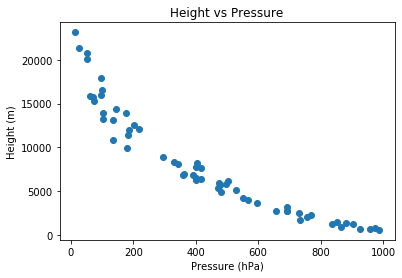

In [59]:
fig, axs = plt.subplots()
axs.scatter(pressure, height)
axs.set_title('Height vs Pressure')
axs.set_xlabel("Pressure (hPa)")
axs.set_ylabel("Height (m)")




### Model description

**1. Model Linearization**

By looking at the plot of the data, it seems like there is a exponential decay or power decay relationship between the pressure and the height.

**Exponential model**:

The first model that we are asked to evaluate is the exponential model:
$$
\begin{equation}
h = ae^{bP}
\tag{1}
\end{equation}
$$
where h is the height and p the pressure [1].
In order to find the values of a and b, I linearized the equation into the form:
$$
\begin{equation}
log(h) = log(a) + bP
\tag{2}
\end{equation}
$$

**Power model**:\
The second model we are asked to evaluate is the power model:
\begin{equation}h = aP^b\tag{3}\end{equation}
Similary, I linearized the equation into the form:
\begin{equation}log(h) = log(a) + b*log(P)\tag{4}\end{equation}

Then I plotted the scatter plots of the linearized exponential model and the power model as shown below:








(0, 20)

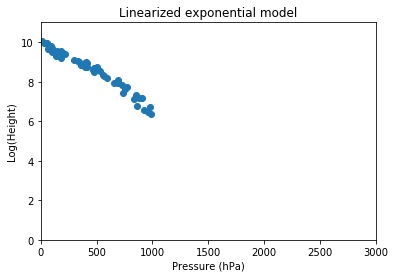

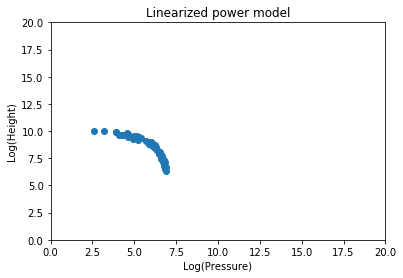

In [60]:

ax = plt.subplot()
ax.scatter(pressure, np.log(height))
ax.set_title('Linearized exponential model')
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("Log(Height)")
ax.set_ylim(0, 11)
ax.set_xlim(0, 3000)



plt.figure()
ax2 = plt.subplot()
ax2.scatter(np.log(pressure), np.log(height))
ax2.set_title('Linearized power model')
ax2.set_xlabel("Log(Pressure)")
ax2.set_ylabel("Log(Height)")
ax2.set_ylim(0, 20)
ax2.set_xlim(0, 20)



**1. Visual/graphical estimation of intercepts**

By using the graphical estimation method, I was able to deduce the following intercepts of the best fit:\
**Exponential model:**
* x_intercept = 2750
* y_intercept = 10

By using the y_intercept into eq. (2):
$$
\begin{align*}
y\_intercept &= log(a) + b*0 \\
y\_intercept &= log(a) \\
e^{y\_intercept} &= a \\
a &= 22026.465 \\
\end{align*} 
$$
Then we plug the value of a and the x_intercept into eq. (2): \
$$
\begin{align*}
0 &= log(a) + b*x\_intercept \\
b &= \frac{-log(a)}{x\_intercept}\\
b &= \frac{-10}{2750} \\
b &= -0.00363
\end{align*}
$$


**Power model:**

* x_intercept = 16.25
* y_intercept = 13

By using the y_intercept into eq. (4):
$$
\begin{align*}
y\_intercept &= log(a) + b*0 \\
y\_intercept &= log(a) \\
e^{y\_intercept} &= a \\
a &= 442413.392 \\
\end{align*} 
$$
Then we plug the value of a and the x_intercept into eq. (4): \
$$
\begin{align*}
0 &= 13 + b*x\_intercept \\
b &= \frac{-13}{x\_intercept}\\
b &= \frac{-13}{16.25} \\
b &= -0.8
\end{align*}
$$



(0, 9)

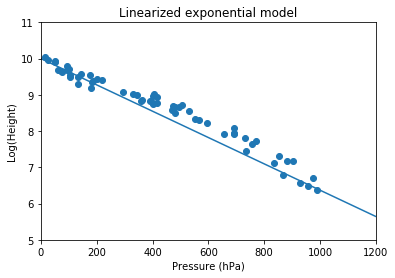

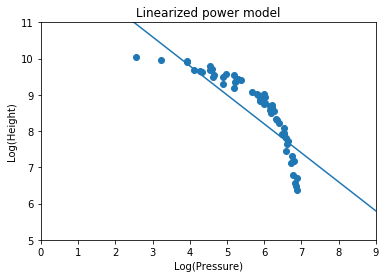

In [72]:
log_a1 = 10
b1 = -0.00363
x1 = np.arange(0, 1200)
y1 = b1*x1 + log_a1
ax = plt.subplot()
ax.scatter(pressure, np.log(height))
ax.plot(x1, y1)
ax.set_title('Linearized exponential model')
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("Log(Height)")
ax.set_ylim(5, 11)
ax.set_xlim(0, 1200)

log_a2 = 13
b2 = -0.8
x2 = np.arange(0, 10)
y2 = b2*x2 + log_a2

plt.figure()
ax2 = plt.subplot()
ax2.scatter(np.log(pressure), np.log(height))
ax2.plot(x2, y2)
ax2.set_title('Linearized power model')
ax2.set_xlabel("Log(Pressure)")
ax2.set_ylabel("Log(Height)")
ax2.set_ylim(5, 11)
ax2.set_xlim(0, 9)

## Results

## Conclusion

## References

[1] Assignment 06 Specifications. (n.d.). Retrieved from https://docs.google.com/document/d/e/2PACX-1vQ_pntgVTJdNdjH1rIfPDE1bFCho3Ccs8LX6C8tRz-LjbrRdfGhmJnSr3xPnx43RiKMdsHRjTC9swIv/pub
